# Building an Image Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras

C:\Users\SONY\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SONY\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\SONY\miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
keras.__version__

'2.4.0'

In [2]:
(x_trai,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:
x_valid,x_train= x_trai[:5000]/255.0,x_trai[5000:]/255.0
y_valid,y_train=y_train[:5000],y_train[5000:]

x_test,y_test=x_test/255.0,y_test/255.0

In [2]:
import numpy as np
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
np.random.seed(42)


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

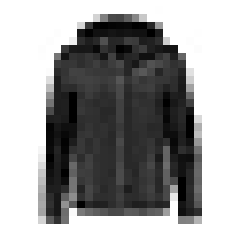

In [8]:
plt.imshow(x_train[0], cmap="binary")
plt.axis('off')
plt.show()

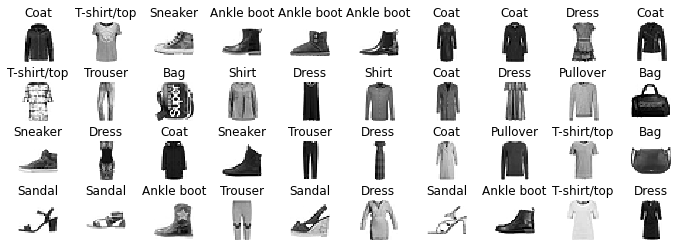

In [9]:
from itertools import product
fig,ax= plt.subplots(4,10,figsize=(12,4))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
filas=[0,1,2,3]
columnas=[0,1,2,3,4,5,6,7,8,9]

for i,index in enumerate(product(filas,columnas)):
    
    x,y= index[0],index[1]
    
    ax[x][y].set_title(class_names[y_train[i]])
    
    ax[x][y].imshow(x_train[i], cmap="binary", interpolation="nearest")

    ax[x][y].axis('off')



In [10]:
modelo=keras.models.Sequential()

In [11]:
modelo.add(keras.layers.Flatten(input_shape=[28,28]))
modelo.add(keras.layers.Dense(300,activation='relu'))
modelo.add(keras.layers.Dense(100,activation='relu'))
modelo.add(keras.layers.Dense(10,activation='softmax'))


In [12]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
modelo.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [14]:
hist= modelo.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7288 - accuracy: 0.7607 - val_loss: 0.5122 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4876 - accuracy: 0.8314 - val_loss: 0.4448 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4428 - accuracy: 0.8456 - val_loss: 0.4136 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4155 - accuracy: 0.8553 - val_loss: 0.4164 - val_accuracy: 0.8568
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3960 - accuracy: 0.8609 - val_loss: 0.3851 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3789 - accuracy: 0.8671 - val_loss: 0.3684 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3664 - accuracy: 0.8709 - val_loss: 0.3682 - val_accuracy:

In [3]:
import pandas as pd


(0.0, 1.0)

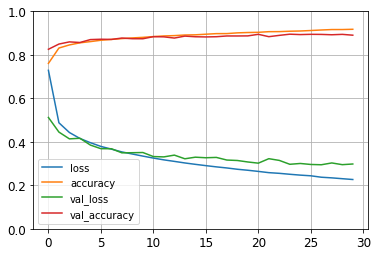

In [16]:
pd.DataFrame(hist.history).plot()
plt.grid(True)
plt.ylim(0,1)

In [18]:
(x_trai,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

modelo.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 73.8727 - accuracy: 0.8300


[73.87274932861328, 0.8299999833106995]

In [20]:
class_names=np.array(class_names)

In [23]:
X_new=x_test[:3]


In [27]:
np.argmax(modelo.predict(X_new),axis=1)

array([9, 2, 1], dtype=int64)

# Regression MLP

In [4]:
from sklearn.datasets import fetch_california_housing;from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X,y= fetch_california_housing(return_X_y=True)

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
modelo=keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
                               keras.layers.Dense(1)])

modelo.compile(loss='mean_squared_error',optimizer='sgd',metrics=['mse'])

In [6]:
histo=modelo.fit(X_train_scaled,y_train,epochs=20,validation_split=0.2)


Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 0.9070 - mse: 0.9070 - val_loss: 0.8737 - val_mse: 0.8737
Epoch 2/20
387/387 [==============================] - 0s 960us/step - loss: 0.7857 - mse: 0.7857 - val_loss: 0.4908 - val_mse: 0.4908
Epoch 3/20
387/387 [==============================] - 0s 939us/step - loss: 0.4452 - mse: 0.4452 - val_loss: 0.4520 - val_mse: 0.4520
Epoch 4/20
387/387 [==============================] - 0s 1ms/step - loss: 0.4161 - mse: 0.4161 - val_loss: 0.4397 - val_mse: 0.4397
Epoch 5/20
387/387 [==============================] - 0s 996us/step - loss: 0.4079 - mse: 0.4079 - val_loss: 0.4274 - val_mse: 0.4274
Epoch 6/20
387/387 [==============================] - 0s 944us/step - loss: 0.3970 - mse: 0.3970 - val_loss: 0.4203 - val_mse: 0.4203
Epoch 7/20
387/387 [==============================] - 0s 996us/step - loss: 0.5279 - mse: 0.5279 - val_loss: 0.4449 - val_mse: 0.4449
Epoch 8/20
387/387 [==============================] - 0s 1ms/step 

In [10]:
modelo.evaluate(X_test_scaled,y_test)

162/162 [==============================] - 0s 893us/step - loss: 0.3686 - mse: 0.3686


[0.3686332702636719, 0.3686332702636719]

In [11]:
y_pred=modelo.predict(X_test_scaled)

In [13]:
r2_score(y_train,modelo.predict(X_train_scaled))

0.7332752861023908

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7214115342708265

<AxesSubplot:>

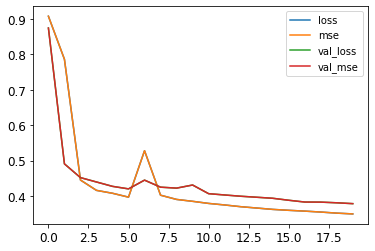

In [15]:
import pandas as pd;

pd.DataFrame(histo.history).plot()

# Functional API

## Wide and Deep NN

In [6]:
import numpy as np


input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model4 = keras.models.Model(inputs=[input_], outputs=[output])





### En el script anterior se conecta directamente todos los elementos de entrada con la capa de salida

In [7]:
model4.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model4.fit(X_train_scaled, y_train, epochs=20,validation_split=0.2)


Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 2.3073 - val_loss: 0.8987
Epoch 2/20
387/387 [==============================] - 0s 1ms/step - loss: 0.7878 - val_loss: 0.7562
Epoch 3/20
387/387 [==============================] - 0s 958us/step - loss: 0.7009 - val_loss: 0.6981
Epoch 4/20
387/387 [==============================] - 0s 955us/step - loss: 0.6533 - val_loss: 0.6574
Epoch 5/20
387/387 [==============================] - 0s 949us/step - loss: 0.6157 - val_loss: 0.6242
Epoch 6/20
387/387 [==============================] - 0s 955us/step - loss: 0.5859 - val_loss: 0.6037
Epoch 7/20
387/387 [==============================] - 0s 963us/step - loss: 0.5618 - val_loss: 0.5783
Epoch 8/20
387/387 [==============================] - 0s 975us/step - loss: 0.5424 - val_loss: 0.5595
Epoch 9/20
387/387 [==============================] - 0s 953us/step - loss: 0.5257 - val_loss: 0.5461
Epoch 10/20
387/387 [==============================] - 0s 965us/step - loss: 0.5121 - 

In [8]:
model4.evaluate(X_test_scaled,y_test)

162/162 [==============================] - 0s 780us/step - loss: 0.4622


0.4622017443180084

In [9]:
from sklearn.metrics import r2_score
y_pred=model4.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.6506987279436535

### En las redes neuronales tipo wide and deep se puede conectar una parte del conjunto de datos de entrada con la capa de salida y el resto a través de las capas escondidas.

In [11]:
inputA=keras.layers.Input(shape=[5])
inputb= keras.layers.Input(shape=[6])
h1=keras.layers.Dense(30,activation='relu')(inputb)
h2=keras.layers.Dense(30,activation='relu')(h1)
conca= keras.layers.concatenate([inputA,h2])
out=keras.layers.Dense(1)(conca)
model= keras.models.Model(inputs=[inputA,inputb],outputs=[out])


In [12]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(lr=0.001))
X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
model.fit(validation_split=0.2,epochs=20,x=[X_train_A,X_train_B],y=y_train)

Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 2.6021 - val_loss: 1.0148
Epoch 2/20
387/387 [==============================] - 0s 1ms/step - loss: 0.7853 - val_loss: 0.6984
Epoch 3/20
387/387 [==============================] - 0s 994us/step - loss: 0.6293 - val_loss: 0.6241
Epoch 4/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5833 - val_loss: 0.5909
Epoch 5/20
387/387 [==============================] - 0s 996us/step - loss: 0.5568 - val_loss: 0.5707
Epoch 6/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5395 - val_loss: 0.5565
Epoch 7/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5266 - val_loss: 0.5443
Epoch 8/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5164 - val_loss: 0.5356
Epoch 9/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5082 - val_loss: 0.5285
Epoch 10/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5012 - val_loss: 0.

In [13]:
model.evaluate((X_test_A,X_test_B),y_test)

162/162 [==============================] - 0s 882us/step - loss: 0.4672


0.4671797752380371

In [18]:
from sklearn.metrics import r2_score
y_pred=model.predict((X_test_A,X_test_B))
r2_score(y_test,y_pred)

0.646936562151637